Since this data is randomly generated, you can also play with it by changing how 𝑦 is computed, then observing how different relationships between 𝑦 and 𝑋 play out in PLSR.

In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

df = pd.read_csv('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\music.csv')

df = df.drop(['artist_mbtags'], axis=1)

df = df.fillna(df.mean()) 

df['similar'] = df['similar'].fillna(df['similar'].mode()[0])
df['terms'] = df['terms'].fillna(df['terms'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])

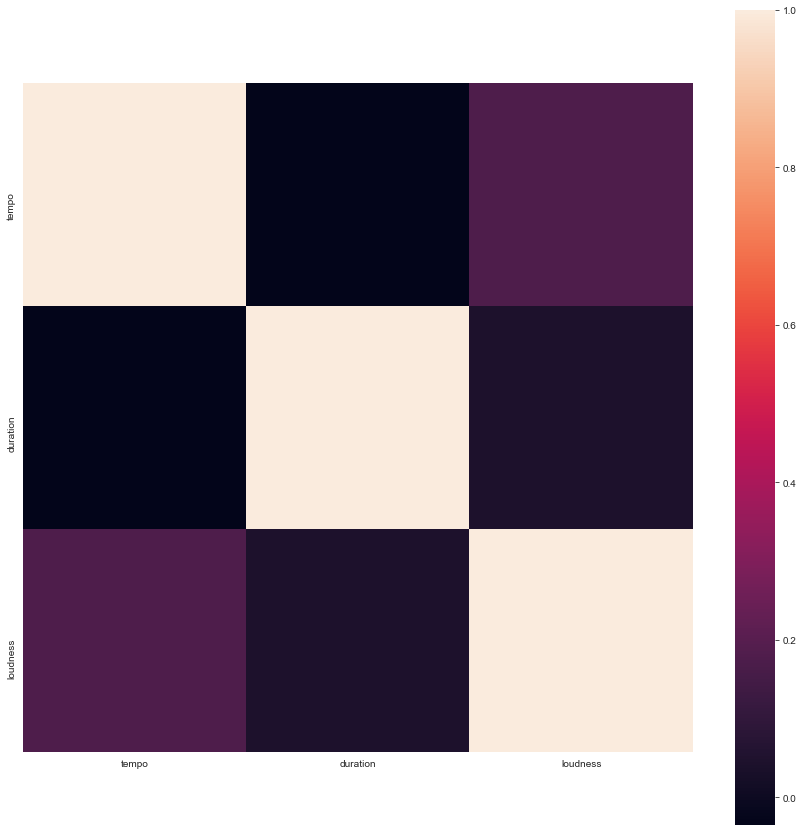

In [2]:
# Number of datapoints in outcome.
#n = 1000

# Number of features.
#p = 10

# Create random normally distributed data for parameters.
#X = np.random.normal(size=n * p).reshape((n, p))
X = df[['tempo', 'duration', 'loudness' ]]


# Create normally distributed outcome related to parameters but with noise.
#y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5
y = df['song.hotttnesss']


# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(15, 15))
corrmat = X.corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

#correlation = X.corr()
#f, ax = plt.subplots(figsize=(12, 9))
#heatmap = sns.heatmap(correlation,square=True)

R-squared regression: 0.027783476495835128
R-squared PLSR: 0.027783476495835128


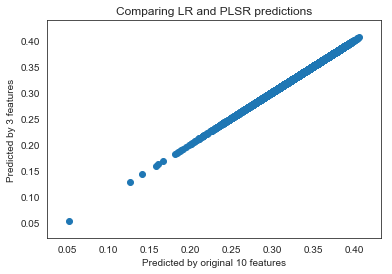

In [3]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X,y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X,y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()